In [1]:
import numpy as np, matplotlib.pyplot as plt
import math, time
from snn.components.neuron_class import Neuron
from snn.components.synapse_class import Synapse
from snn.components.network_class import *
from snn.functions import *

In [2]:
np.random.seed(0)

Text(0.5, 1.0, 'PSP waveform')

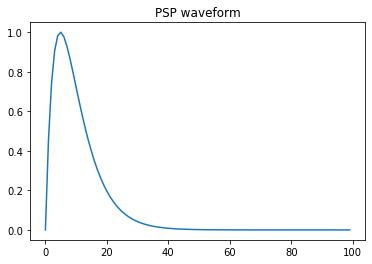

In [3]:
dt=1e-3
h = get_psp_waveform(dt, tau1=6e-3, tau2=4e-3)
plt.plot(h)
plt.title("PSP waveform")

define constants

In [4]:
w_self = -1
w_cross = 1
v_init=np.random.uniform(0, 1, size=(2,1))
T = 1000
V_0 = 1.5
v_ext = V_0*np.ones((2, T)) #same frequency of oscillation
adj_mat = np.array([[1, 1], [1, 1]])

In [5]:
net, probe = create_network(2, w_self, w_cross, adj_mat, h, v_init, T)

In [6]:
tic = time.time()
for ti in range(T):
    net.update_state(dt, v_ext[:,ti].reshape((-1,1)), probe, ti)
    
print(f"Time take for {T} iterations={time.time()-tic}s")

Time take for 1000 iterations=0.08518862724304199s


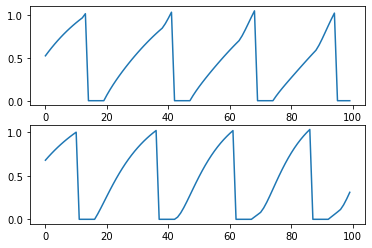

In [7]:
fig, ax = plt.subplots(2)
ax[0].plot(probe['v'][net.neurons[0].id,:100])
ax[1].plot(probe['v'][net.neurons[1].id,:100])

In [8]:
f_n1, fint_n1, floc_n1  = freq(probe['spike'][net.neurons[0].id, :], dt, get_f_loc=True, get_f_interpolated=True)
f_n2, fint_n2, floc_n2  = freq(probe['spike'][net.neurons[1].id, :], dt, get_f_loc=True, get_f_interpolated=True)

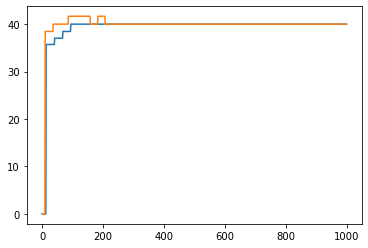

In [9]:
plt.plot(fint_n1)
plt.plot(fint_n2)

In [10]:
settling_time(fint_n1, fint_n2)

0.206

In [11]:
def phase(spk_train, dt, f):
    '''
    spk_train is a binary spike train of size (T, )
    '''
    T = len(spk_train)
    phi = np.zeros((T,1))   
    assert (f.shape==spk_train.shape)
    
    t = np.linspace(0, (T-1)*dt, T)
    t_spike = dt*np.argwhere(spk_train).reshape((-1,))
    t_spk_intp = np.zeros(spk_train.shape)
    for i in range(len(t_spike)-1):
        t_spk_intp[int(t_spike[i]/dt):int(t_spike[i+1]/dt)] = t_spike[i]
    t_spk_intp[int(t_spike[-1]/dt):] = t_spike[-1]
    #plt.plot(t_spk_intp)
    phi = 360*np.multiply(f, t-t_spk_intp) 
    return phi

In [12]:
phi = phase(probe['spike'][0,:], dt, fint_n1)

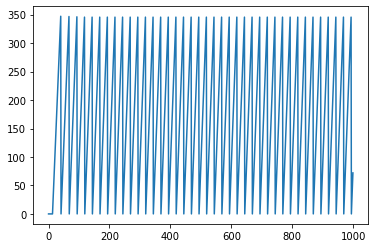

In [13]:
plt.plot(phi)

In [14]:
phi1 = phase(probe['spike'][1,:], dt, fint_n2)

In [15]:
# delphi = np.minimum(np.abs(phi-phi1), 360-(np.abs(phi-phi1)))
delphi = (phi-phi1)%360

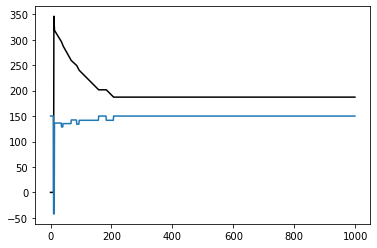

In [16]:
# plt.plot(phi[:500], 'r')
# plt.plot(phi1[:500], 'b')
plt.plot(delphi, 'k')
plt.plot(150+5*(fint_n1-fint_n2))

In [36]:
def osc_state(spk_train_all, dt):
    '''
    returns the frequency and phase of all oscillators as functions of time
    '''
    N, T = spk_train_all.shape
    f = np.zeros(spk_train_all.shape)
    phi = np.zeros(spk_train_all.shape)
    for n in range(N):
        _,f_n,_ = freq(spk_train_all[n,:].reshape((-1,)), dt, get_f_interpolated=True)
        phi_n = phase(spk_train_all[n, :].reshape((-1,)), dt, f_n)
        f[n,:] = f_n
        phi[n,:] = phi_n
    return f, phi

In [37]:
f, phi = osc_state(probe['spike'], dt)

In [35]:
probe['spike'].shape

(2, 1000)

In [38]:
f

array([[ 0.,  0.,  0., ..., 40., 40., 40.],
       [ 0.,  0.,  0., ..., 40., 40., 40.]])

In [39]:
phi

array([[  0. ,   0. ,   0. , ...,  43.2,  57.6,  72. ],
       [  0. ,   0. ,   0. , ..., 216. , 230.4, 244.8]])

[]

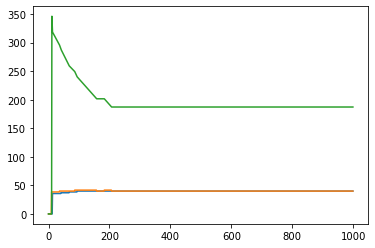

In [45]:
plt.plot(f[0,:])
plt.plot(f[1,:])
plt.plot((phi[0,:]-phi[1,:])%360)
plt.plot()

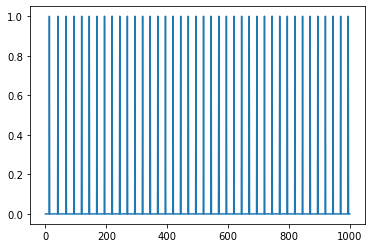

In [24]:
plt.plot(probe['spike'][0,:])